In [ ]:
!nvidia-smi

Thu Feb  4 13:26:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
print(tf.ones(shape=(2,3)))

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)


In [ ]:
import tensorflow as tf
print(tf.ones(shape=(2,3)))

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)


In [ ]:
import tensorflow as tf
print(tf.ones(shape=(2,3)))

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)


In [ ]:
import tensorflow as tf

t = tf.constant(2,3)
t

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [ ]:
import tensorflow as tf
from mnist import MNIST
mndata = MNIST('./dir_with_mnist_data_files')

Tensorflow Version: 2.3.0
Keras Version: 2.4.0
11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/80
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2655 - accuracy: 0.9199 - val_loss: 0.1240 - val_accuracy: 0.9612
Epoch 2/80
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1067 - accuracy: 0.9667 - val_loss: 0.0981 - val_accuracy: 0.9698
Epoch 3/80
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0760 - accuracy: 0.9762 - val_loss: 0.0885 - val_accuracy: 0.9720
Epoch 4/80
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0599 - accuracy: 0.9811 - val_loss: 0.0837 - val_accuracy: 0.9762
Epoch 5/80
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0491 - accuracy: 0.9838 - val_loss: 0.0752 - val_accuracy: 0.9788
Epoch 6/80
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0400 - accuracy: 0.9870 - val_loss: 0.0935 - val_accuracy: 0.9774
Epoch 7/80
1719/1719 [==

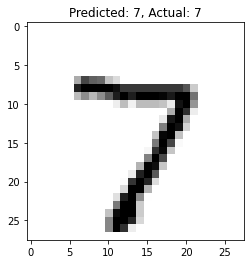

------------------------------------------------------------


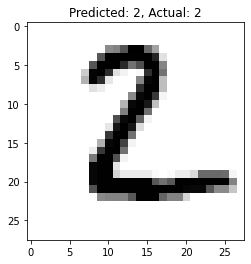

------------------------------------------------------------


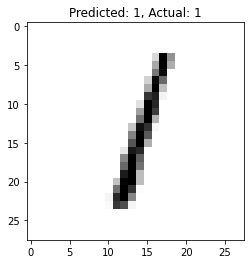

------------------------------------------------------------


In [ ]:
import tensorflow as tf
print(f"Tensorflow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(130, activation="relu", name="hiddenLayer71"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer102"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer312"),
          tf.keras.layers.Dense(50, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = 'adam' # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER , metrics=METRICS)

EPOCHS = 80

VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                        validation_data=VALIDATION_SET)

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path
    UNIQUE_PATH = model_clf.save(saveModel_path())

model_clf.evaluate(X_test, y_test)
X_new = X_test[:3]
y_proba = model_clf.predict(X_new)
y_proba.round(2)
y_pred = np.argmax(model_clf.predict(X_new), axis=-1)
y_pred
y_test_new = y_test[:3]

for data, pred, actual in zip(X_new, y_pred, y_test_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis('on')
    plt.show()
    print("---"*20)




